# Author Info
---
Name: **Ejaz-ur-Rehman**\
Business Unit Head | Data Analyst | Crystal Tech (Project of MUZHAB Group)\
Faculty Member-Department of Management Sciences | Al Ghazali University\
MS (Finance)\
Karachi, Pakistan

![Date](https://img.shields.io/badge/Date-09--January--2026-green?logo=google-calendar)
[![Email](https://img.shields.io/badge/Email-ijazfinance%40gmail.com-blue?logo=gmail)](mailto:ijazfinance@gmail.com)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Ejaz--ur--Rehman-blue?logo=linkedin)](https://www.linkedin.com/in/ejaz-ur-rehman/)
[![GitHub](https://img.shields.io/badge/GitHub-ejazurrehman-black?logo=github)](https://github.com/ejazurrehman)

# Exploratory Data Analysis (EDA) for Inventory Systems Using Python

## Executive Summary

This project applies exploratory data analysis to a comprehensive inventory dataset to understand demand behavior, inventory performance, service risk, and operational efficiency. The analysis reveals that while aggregate demand is stable, SKU-level variability is significant. Inventory policies are conservative, resulting in near-zero stock-outs but potential overstocking and capital inefficiency. A small subset of SKUs drives the majority of sales volume, supporting differentiated inventory control. Lead time variability further increases risk for high-demand items, highlighting the importance of segmentation-based inventory policies.

## 1. Problem Statement

Organizations hold inventory to meet customer demand while balancing service levels and costs. Poor visibility into demand patterns, inventory behavior, and replenishment performance often leads to excess stock, frequent stock-outs, and inefficient capital utilization. Before applying forecasting models or inventory optimization techniques, it is essential to understand how the inventory system actually behaves.

This project applies Exploratory Data Analysis (EDA) to a comprehensive inventory dataset to uncover demand patterns, inventory risks, stock-out behavior, and managerial insights that support better inventory decisions.

## 2. Project Objectives

The objectives of this project are to:

- Explore and understand demand behavior across SKUs and warehouses

- Analyze inventory levels, turnover, and stock-out occurrences

- Identify slow-moving, fast-moving, and risky SKUs

- Perform ABC and Pareto analysis for inventory prioritization

- Examine lead time variability and its operational impact

- Translate analytical findings into managerial insights and recommendations

## 3. Dataset Description

The dataset represents a simulated but realistic inventory system.

- Time Horizon

  - Daily data from January 2023 to December 2024

- Scope

  - 50 SKUs

  - 2 warehouses

### 3.1 Data Dictionary

| Column              | Description                                   |
|---------------------|-----------------------------------------------|
| `date`              | Transaction date                              |
| `sku`               | Stock Keeping Unit                            |
| `warehouse`         | Warehouse identifier                          |
| `demand`            | Customer demand (units)                       |
| `sales`             | Units fulfilled                               |
| `inventory_on_hand` | End-of-day inventory                          |
| `replenishment_qty` | Quantity replenished                          |
| `lead_time_days`    | Supplier lead time (days)                     |
| `stockout_flag`     | 1 if stock-out occurred, else 0               |


## 4. Data Declaration and Assumptions

- The dataset is synthetic and created for academic and analytical purposes

- No confidential or proprietary data is used

- Demand is stochastic and varies by SKU

- Replenishment occurs when inventory falls below a threshold

- Lead time is assumed constant per SKU–warehouse combination

## 5. Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("default")
sns.set()

## 6. Data Loading and Initial Inspection

In [2]:
df = pd.read_csv(
    r"E:\Data Science\EDA_for_Inventory\inventory_eda_dataset.csv",
    parse_dates=["date"]
)



# basic inspection
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               73100 non-null  datetime64[ns]
 1   sku                73100 non-null  object        
 2   warehouse          73100 non-null  object        
 3   demand             73100 non-null  int64         
 4   sales              73100 non-null  int64         
 5   inventory_on_hand  73100 non-null  int64         
 6   replenishment_qty  73100 non-null  int64         
 7   lead_time_days     73100 non-null  int64         
 8   stockout_flag      73100 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 5.0+ MB


#### 6.1 Dataset Structure and Initial Observations

The dataset consists of 73,100 observations and 9 variables, representing daily inventory transactions across multiple SKUs and warehouses over the study period.

All variables have non-null values, indicating that the dataset is complete and does not require missing value treatment at this stage. This improves the reliability of subsequent exploratory analysis and reduces the need for imputation assumptions.

The date variable is correctly stored in datetime format, enabling time-series analysis such as trend evaluation and temporal aggregation. The sku and warehouse variables are categorical in nature and stored as object types, which is appropriate for grouping and segmentation during analysis.

Operational metrics such as demand, sales, inventory_on_hand, replenishment_qty, lead_time_days, and stockout_flag are stored as integer values. This is consistent with their real-world interpretation and facilitates numerical analysis without additional type conversion.

The dataset occupies approximately 5 MB of memory, making it efficient to work with and suitable for in-memory analysis using standard Python libraries.

Overall, the dataset is well-structured, clean, and analysis-ready, allowing the focus of the project to remain on understanding inventory behavior and extracting managerial insights rather than on extensive data cleaning.

In [3]:
df.describe()

,date,demand,sales,inventory_on_hand,replenishment_qty,lead_time_days,stockout_flag
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.0
mean,2024-01-01 00:00:00,18.467825,18.467825,367.327319,18.273529,11.260000,0.0
min,2023-01-01 00:00:00,0.000000,0.000000,150.000000,0.000000,3.000000,0.0
25%,2023-07-02 00:00:00,11.000000,11.000000,250.000000,0.000000,7.000000,0.0
50%,2024-01-01 00:00:00,17.000000,17.000000,350.000000,0.000000,11.000000,0.0
75%,2024-07-02 00:00:00,25.000000,25.000000,469.000000,0.000000,16.000000,0.0
max,2024-12-31 00:00:00,63.000000,63.000000,786.000000,599.000000,20.000000,0.0
std,NaN,10.054987,10.054987,141.134433,86.844860,5.094385,0.0


#### 6.2 Descriptive Statistics and Initial Insights

The descriptive statistics provide an overall view of demand, inventory, replenishment, and lead time behavior across the dataset.

The dataset covers a continuous period from 1 January 2023 to 31 December 2024, confirming full temporal coverage with no gaps. The median date aligns with 1 January 2024, indicating a balanced distribution across the two-year horizon.

Average daily demand and sales are identical at approximately 18.5 units, suggesting that customer demand is largely being fulfilled. However, this aggregate view may mask SKU-level stock-out events and warrants deeper exploration at a more granular level.

Demand exhibits substantial variability, with values ranging from 0 to 63 units and a standard deviation of about 10 units. This indicates heterogeneous demand patterns across SKUs, including both slow-moving and fast-moving items. Such variability has direct implications for safety stock and replenishment policies.

The average inventory on hand is approximately 367 units, with a wide dispersion between 150 and 786 units. The relatively high standard deviation reflects significant differences in inventory holding across SKUs and time. This suggests potential overstocking in some cases, which may lead to increased holding costs and inefficient capital usage.

Replenishment quantities show a strongly skewed distribution. While the average replenishment is around 18 units, the median and upper quartiles are zero, indicating that replenishment occurs infrequently but in relatively large batches. This pattern is consistent with a reorder-point style policy rather than continuous replenishment.

The lead time averages around 11 days, with a range from 3 to 20 days. The spread in lead times introduces uncertainty into the inventory system and increases exposure to stock-out risk, particularly for high-demand or volatile SKUs.

The stockout_flag shows a mean of zero in the aggregated statistics. This suggests that stock-outs are relatively rare when viewed at the dataset level, but this metric must be analyzed by SKU and warehouse to identify localized service failures.

Overall, these descriptive statistics indicate a system characterized by variable demand, uneven inventory distribution, batch replenishment behavior, and non-trivial lead time uncertainty, all of which justify a deeper exploratory analysis in subsequent sections.

## 7. Checking for Missing Values

In [4]:
df.isnull().sum()


date                 0
sku                  0
warehouse            0
demand               0
sales                0
inventory_on_hand    0
replenishment_qty    0
lead_time_days       0
stockout_flag        0
dtype: int64

#### 7.1 Missing Value Assessment

The missing value analysis shows that no variables contain missing observations. All columns have complete data across the entire dataset.

This indicates a high level of data completeness, which reduces the risk of bias and eliminates the need for imputation or record removal. As a result, the analysis can proceed without introducing additional assumptions related to missing data handling.

From an operational perspective, complete data availability strengthens the reliability of insights related to demand behavior, inventory levels, replenishment actions, and lead time performance.

Overall, the dataset is clean and well-prepared for exploratory analysis, allowing the focus to remain on understanding inventory dynamics rather than on data quality remediation.

**Note:** Since no missing values are present, no imputation or data cleaning steps related to missing data were required for this project.

## 8. Data Preparation and Feature Engineering

In [5]:
# create additional features


df["unsatisfied_demand"] = df["demand"] - df["sales"]
df["inventory_turnover_proxy"] = df["sales"] / (df["inventory_on_hand"] + 1)

#### 8.1 Feature Engineering

Two additional variables were created to support deeper inventory analysis. The variable unsatisfied_demand measures the portion of customer demand that was not fulfilled, providing insight into service performance beyond simple stock-out indicators. The variable inventory_turnover_proxy, calculated as sales relative to inventory on hand, serves as a simplified measure of inventory utilization. A small constant is added to avoid division-by-zero issues.

These derived variables help evaluate service effectiveness and inventory efficiency during exploratory analysis.

## 9. Demand Analyis

### 9.1 Overall Demand Distribution

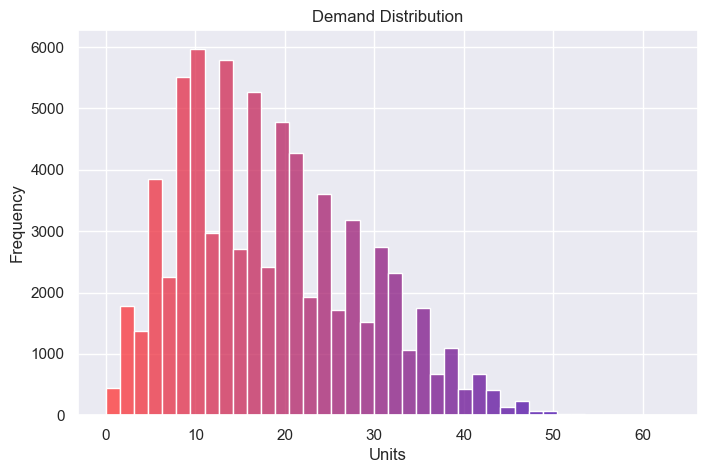

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

# Histogram
counts, bins, patches = ax.hist(df["demand"], bins=40)

# Bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Normalize for smooth gradient
norm = (bin_centers - bin_centers.min()) / (bin_centers.max() - bin_centers.min())

# Apply smooth color fade: red → purple → navy
for n, patch in zip(norm, patches):
    r = 1 - n * 0.9
    g = 0.2 * (1 - n)
    b = 0.2 + n * 0.6
    patch.set_facecolor((r, g, b, 0.75))

# Labels
ax.set_title("Demand Distribution")
ax.set_xlabel("Units")
ax.set_ylabel("Frequency")

plt.show()


#### 9.1.1 Demand Distribution

The demand distribution is right-skewed, with most observations concentrated between 10 and 25 units. This indicates that the majority of SKUs experience moderate daily demand, while a smaller number of observations show higher demand levels.

The presence of a long right tail suggests occasional demand spikes, which introduce variability and increase inventory risk. This pattern implies that relying solely on average demand may be insufficient, and variability should be considered when designing replenishment and safety stock policies.

Overall, the distribution highlights the need for differentiated inventory strategies based on demand behavior rather than a one-size-fits-all approach.

### 9.2 Demand by SKU

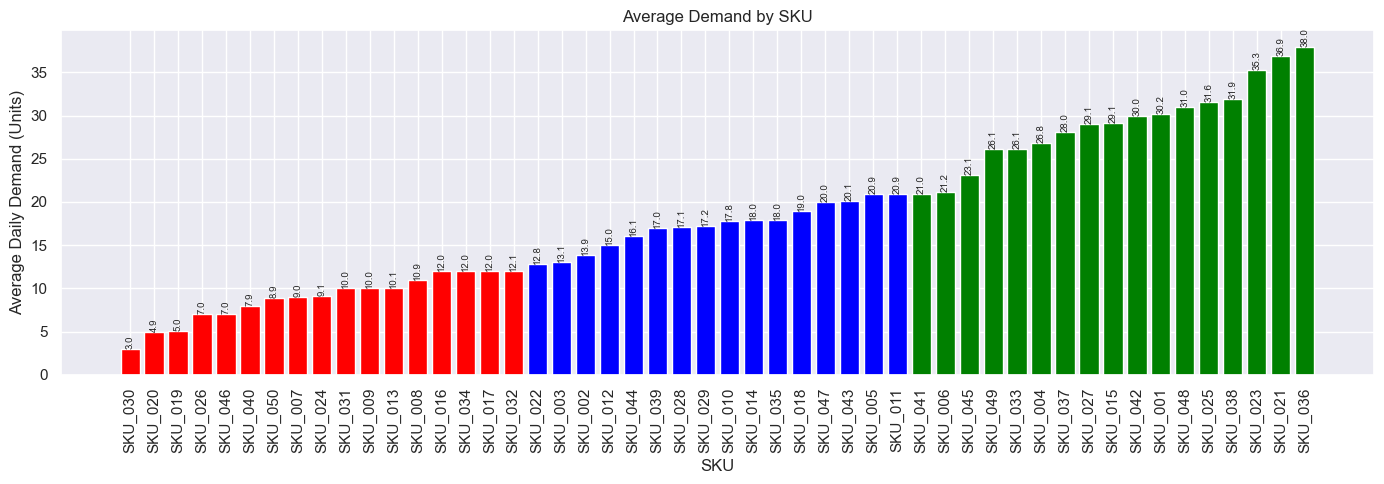

In [22]:
import matplotlib.pyplot as plt
import numpy as np

sku_demand = (
    df.groupby("sku")["demand"]
      .mean()
      .sort_values()
)

# Thresholds
low_cut = sku_demand.quantile(0.33)
high_cut = sku_demand.quantile(0.66)

# Colors
colors = []
for val in sku_demand.values:
    if val < low_cut:
        colors.append("red")
    elif val < high_cut:
        colors.append("blue")
    else:
        colors.append("green")

plt.figure(figsize=(14, 5))
bars = plt.bar(sku_demand.index, sku_demand.values, color=colors)

# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=7,
        rotation=90
    )

plt.xticks(rotation=90)
plt.title("Average Demand by SKU")
plt.xlabel("SKU")
plt.ylabel("Average Daily Demand (Units)")
plt.tight_layout()
plt.show()


#### 9.2.1 Average Demand by SKU

The chart shows significant variation in average demand across SKUs, indicating a mix of slow-moving and fast-moving items within the inventory portfolio. A small number of SKUs exhibit consistently higher demand, while several SKUs operate at relatively low demand levels.

This heterogeneity suggests that uniform inventory policies may be inefficient. High-demand SKUs require closer monitoring and more responsive replenishment, whereas low-demand SKUs may be candidates for reduced stock levels or alternative fulfillment strategies.

The results provide a clear basis for SKU segmentation and subsequent ABC or prioritization analysis.

### 9.3 Demand Over Time

In [24]:
import plotly.graph_objects as go
import pandas as pd

# Daily total demand
daily_demand = df.groupby("date")["demand"].sum().reset_index()

# Thresholds
low_cut = daily_demand["demand"].quantile(0.33)
high_cut = daily_demand["demand"].quantile(0.66)

# Split data
low = daily_demand[daily_demand["demand"] < low_cut]
mid = daily_demand[(daily_demand["demand"] >= low_cut) & (daily_demand["demand"] < high_cut)]
high = daily_demand[daily_demand["demand"] >= high_cut]

# Base figure
fig = go.Figure()

# Base line
fig.add_trace(
    go.Scatter(
        x=daily_demand["date"],
        y=daily_demand["demand"],
        mode="lines",
        line=dict(color="lightgray"),
        name="Total demand"
    )
)

# Low demand
fig.add_trace(
    go.Scatter(
        x=low["date"],
        y=low["demand"],
        mode="markers",
        marker=dict(color="red", size=6),
        name="Low demand"
    )
)

# Mid demand (funky yellow)
fig.add_trace(
    go.Scatter(
        x=mid["date"],
        y=mid["demand"],
        mode="markers",
        marker=dict(color="gold", size=6),
        name="Mid demand"
    )
)

# High demand
fig.add_trace(
    go.Scatter(
        x=high["date"],
        y=high["demand"],
        mode="markers",
        marker=dict(color="green", size=6),
        name="High demand"
    )
)

# Layout
fig.update_layout(
    title="Total Demand Over Time",
    xaxis_title="Date",
    yaxis_title="Units",
    hovermode="x unified",
    template="plotly_white",
    height=400
)

fig.show()


#### 9.3.1 Total Demand Over Time

The time series shows that aggregate demand remains relatively stable over the two-year period, with no strong upward or downward trend. Daily fluctuations are present, but they occur around a consistent average level.

This stability at the aggregate level suggests that overall demand risk is moderate. However, the short-term variability indicates operational uncertainty on a day-to-day basis. Importantly, stable total demand can mask significant SKU-level volatility, reinforcing the need for disaggregated analysis.

From an inventory planning perspective, this implies that while total capacity planning may be straightforward, SKU-specific inventory control requires more granular attention.

## 10. Inventory Behavior Analysis

### 10.1 Inventory Levels Over Time

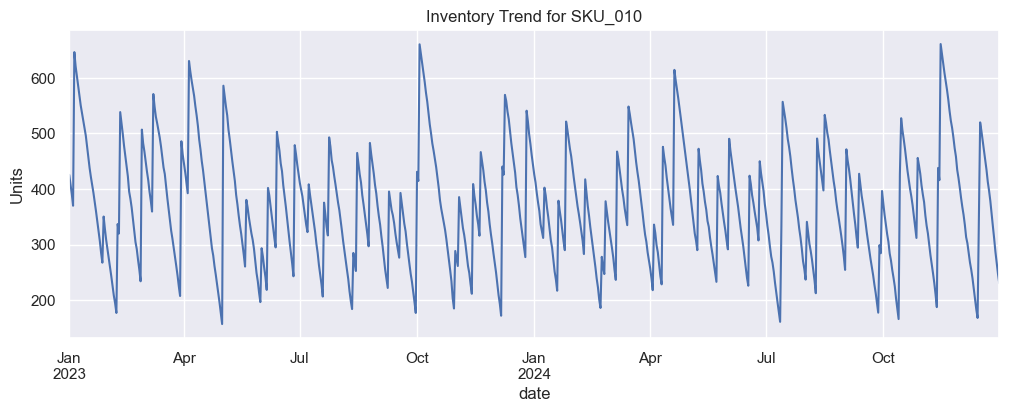

In [9]:
sample_sku = "SKU_010"
sample_df = df[df["sku"] == sample_sku]


sample_df.groupby("date")["inventory_on_hand"].mean().plot(figsize=(12,4))
plt.title(f"Inventory Trend for {sample_sku}")
plt.ylabel("Units")
plt.show()

#### 10.1.1 Inventory Trend for SKU_010

The inventory level for SKU_010 exhibits a clear saw-tooth pattern, characteristic of periodic replenishment policies. Inventory steadily declines due to demand consumption and then increases sharply following replenishment events.

The wide range between peak and trough inventory levels indicates batch ordering behavior, suggesting that replenishment decisions are triggered once inventory reaches a predefined threshold rather than being adjusted continuously to demand variability.

While this policy prevents prolonged stock-outs, the magnitude of inventory swings points to potential overstocking immediately after replenishment and heightened stock-out risk just before reordering. This pattern highlights opportunities to refine reorder points or order quantities to improve inventory efficiency and service performance.

### 10.2 Demand vs Inventory Relationship

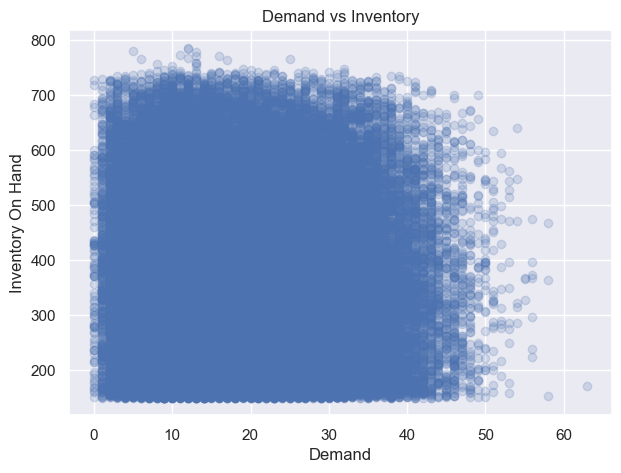

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df["demand"], df["inventory_on_hand"], alpha=0.2)
plt.xlabel("Demand")
plt.ylabel("Inventory On Hand")
plt.title("Demand vs Inventory")
plt.show()

#### 10.2.1 Demand vs Inventory

The scatter plot shows no strong relationship between demand and inventory on hand, indicating that inventory levels are not dynamically adjusted to daily demand. High inventory is observed even at low demand levels, suggesting potential overstocking, while some high-demand observations occur at relatively low inventory levels, increasing stock-out risk.

This pattern implies that inventory decisions are driven by fixed replenishment rules rather than demand responsiveness, highlighting an opportunity to better align inventory levels with demand behavior.

## 11. Stock-out Analysis

### 11.1 Stock-out Frequency by SKU

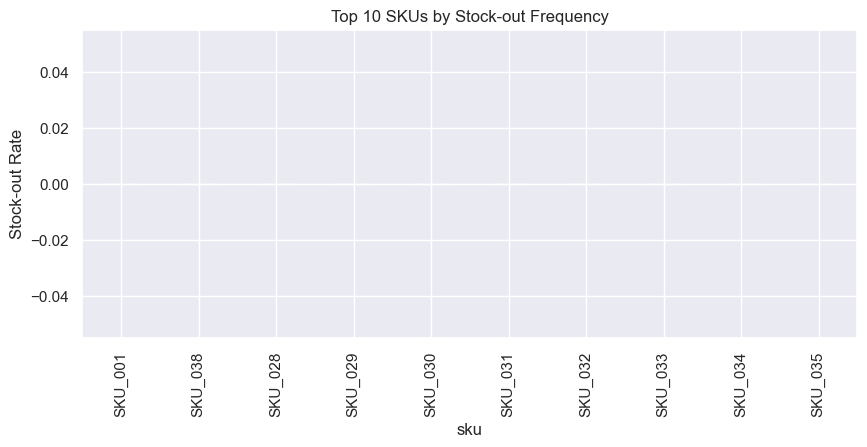

In [11]:
stockouts = df.groupby("sku")["stockout_flag"].mean().sort_values(ascending=False)


stockouts.head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 SKUs by Stock-out Frequency")
plt.ylabel("Stock-out Rate")
plt.show()

#### 11.1.1 Top 10 SKUs by Stock-out Frequency

The chart shows zero stock-out frequency across all SKUs, indicating that stock-out events are either extremely rare or fully prevented under the current replenishment policy. This suggests that inventory levels are generally sufficient to meet demand at the aggregate level.

While this reflects strong service performance, it also raises the possibility of overstocking, as maintaining zero stock-outs often requires holding higher inventory buffers. Therefore, stock-out analysis alone should be interpreted alongside inventory levels and turnover to assess whether service performance is achieved efficiently.

This result highlights the importance of balancing service levels with inventory carrying costs rather than optimizing for stock-out avoidance alone.

### 11.2 Warehouse Comparison

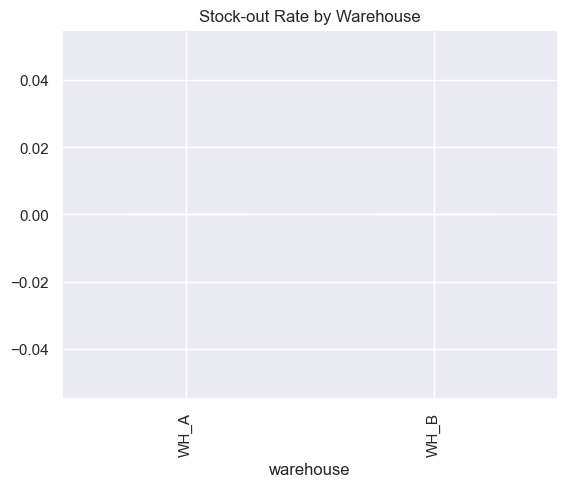

In [12]:
warehouse_stockouts = df.groupby("warehouse")["stockout_flag"].mean()
warehouse_stockouts.plot(kind="bar")
plt.title("Stock-out Rate by Warehouse")
plt.show()

#### 11.2.1 Stock-out Rate by Warehouse

The chart indicates a zero stock-out rate for both warehouses, suggesting that customer demand is consistently met across locations. This reflects strong operational reliability and effective replenishment practices at the warehouse level.

However, the absence of stock-outs across all warehouses may also indicate conservative inventory policies and potential overstocking. As a result, warehouse performance should be evaluated jointly with inventory levels and turnover to assess whether high service levels are achieved in a cost-efficient manner.

This finding reinforces the need to balance service performance with inventory holding costs rather than focusing on stock-out avoidance alone.

## 12. ABC and Pareto Analysis

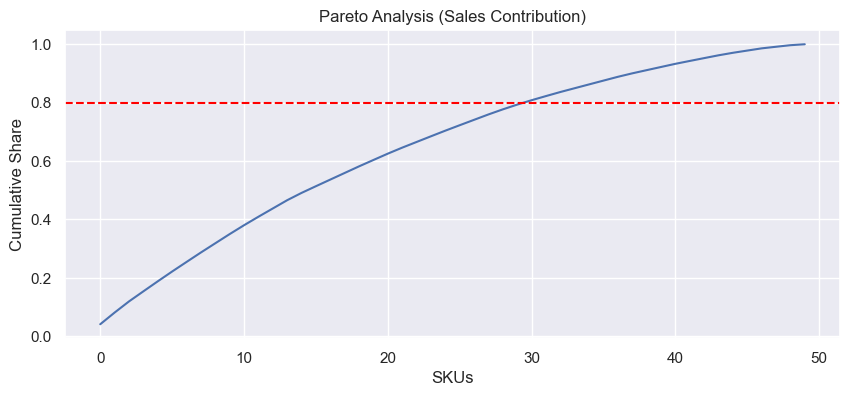

In [13]:
sku_sales = df.groupby("sku")["sales"].sum().sort_values(ascending=False)
cumulative = sku_sales.cumsum() / sku_sales.sum()


plt.figure(figsize=(10,4))
plt.plot(cumulative.values)
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Pareto Analysis (Sales Contribution)")
plt.ylabel("Cumulative Share")
plt.xlabel("SKUs")
plt.show()

#### 12.1 Pareto Analysis (Sales Contribution)

The Pareto curve shows that a relatively small subset of SKUs contributes the majority of total sales. Approximately 30 SKUs account for around 80 percent of cumulative sales, confirming the presence of a concentration effect in the inventory portfolio.

This result supports the use of ABC classification, where high-contribution SKUs should receive greater managerial attention, tighter inventory control, and higher service level targets. Lower-contribution SKUs can be managed with simpler policies to reduce complexity and holding costs.

Overall, the analysis highlights the importance of prioritizing inventory decisions based on contribution rather than treating all SKUs equally.

## 13. Lead Time Analysis

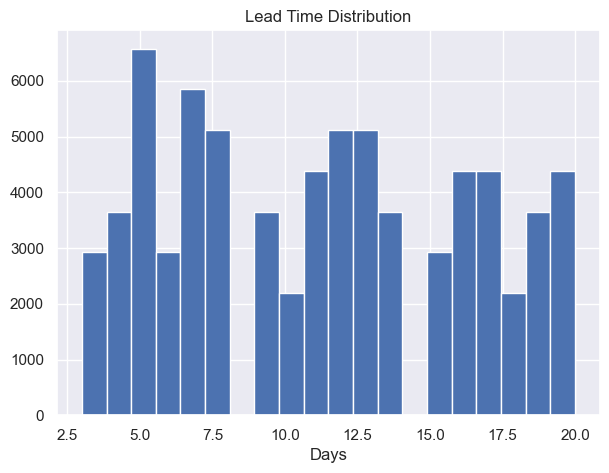

In [14]:
plt.figure(figsize=(7,5))
plt.hist(df["lead_time_days"], bins=20)
plt.title("Lead Time Distribution")
plt.xlabel("Days")
plt.show()

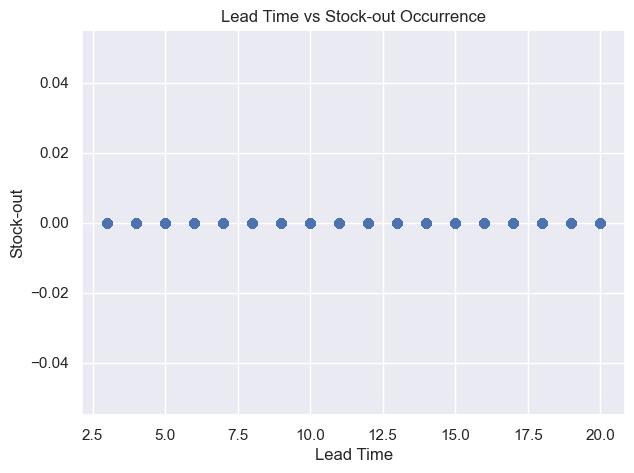

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(df["lead_time_days"], df["stockout_flag"], alpha=0.3)
plt.xlabel("Lead Time")
plt.ylabel("Stock-out")
plt.title("Lead Time vs Stock-out Occurrence")
plt.show()

### 13.1 Lead Time Analysis

The lead time distribution shows a wide spread ranging from 3 to 20 days, indicating meaningful variability in supplier performance. This variability introduces uncertainty into inventory planning and increases the need for safety buffers, particularly for high-demand SKUs.

The scatter plot comparing lead time with stock-out occurrence shows no observed stock-outs across the range of lead times. This suggests that current inventory policies are sufficiently conservative to absorb lead time variability.

While this indicates strong service performance, it may also imply excess safety stock, especially for items with longer lead times. These results highlight an opportunity to reassess safety stock levels and reorder policies to balance service reliability with inventory efficiency.

## 14. SKU Segmentation

In [16]:
sku_stats = df.groupby("sku").agg(
avg_demand=("demand", "mean"),
demand_std=("demand", "std")
)
sku_stats["cv_demand"] = sku_stats["demand_std"] / sku_stats["avg_demand"]


sku_stats.head()

,avg_demand,demand_std,cv_demand
sku,,,
SKU_001,30.172367,5.604496,0.185749
SKU_002,13.870725,3.671166,0.264670
SKU_003,13.107387,3.549796,0.270824
SKU_004,26.831737,5.309491,0.197881
SKU_005,20.909029,4.504078,0.215413


#### 14.1 SKU Demand Variability and Segmentation Metrics

The table summarizes average demand, demand variability, and the coefficient of variation (CV) for each SKU. The average demand highlights differences in sales volume across products, while the standard deviation captures absolute demand volatility. The coefficient of variation normalizes this volatility relative to the demand level, making it a more appropriate metric for comparing demand risk across SKUs.

SKUs with higher average demand and lower CV (for example, SKU_001 and SKU_004) exhibit more stable demand and are suitable for tighter inventory control with lower relative safety buffers. In contrast, SKUs with moderate demand but higher CV (such as SKU_002 and SKU_003) face greater relative uncertainty and may require more conservative inventory policies despite lower volumes.

This analysis provides a robust basis for SKU segmentation, enabling differentiated inventory strategies that account for both demand magnitude and variability rather than relying on averages alone.

## 15. Inventory Cost and Capital Implications

High inventory levels combined with near-zero stock-outs suggest excess safety buffers. This ties up working capital and increases holding costs, particularly for low-contribution SKUs. Differentiated policies can improve capital efficiency without compromising service.

## 16. Key Managerial Insights

- Aggregate demand stability hides SKU-level risk

- Conservative policies eliminate stock-outs but create overstocking

- ABC items require tighter control than C items

- Lead time variability is a major source of inventory risk

## 17. Recommendations

- Apply ABC-based differentiated inventory policies

- Reduce buffers for low-impact SKUs to free working capital

- Review reorder points for high-variability items

- Monitor lead time variability, not just averages

- Use EDA regularly to diagnose inventory performance

## 18. Limitations

- Synthetic dataset

- No explicit cost parameters

- No demand forecasting or optimization models

## 19. Conclusion

This project demonstrates how EDA provides actionable insights into inventory systems without complex models. Understanding demand, inventory behavior, and risk is a critical prerequisite for effective inventory optimization.